<img src="images/usm.jpg" width="480" height="240" align="left"/>

# MAT281 - Laboratorio N°06

## Objetivos de la clase

* Reforzar los conceptos básicos del E.D.A..

## Contenidos

* [Problema 01](#p1)


## Problema 01
<img src="./images/logo_iris.jpg" width="360" height="360" align="center"/>

El **Iris dataset** es un conjunto de datos que contine una  muestras de tres especies de Iris (Iris setosa, Iris virginica e Iris versicolor). Se midió cuatro rasgos de cada muestra: el largo y ancho del sépalo y pétalo, en centímetros.

Lo primero es cargar el conjunto de datos y ver las primeras filas que lo componen:

In [1]:
# librerias
 
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', 500)  # Ver más columnas de los dataframes


# Ver gráficos de matplotlib en jupyter notebook/lab
%matplotlib inline

In [2]:
# cargar datos
df = pd.read_csv(os.path.join("data","iris_contaminados.csv"))
df.columns = ['sepalLength',
                  'sepalWidth',
                  'petalLength',
                  'petalWidth',
                  'species']

df.head() 

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,4.4,3.2,1.3,3.0,setosa
1,7.2,3.6,6.1,2.5,virginica
2,6.3,3.3,6.0,2.5,VIRGINICA
3,6.7,3.3,5.7,2.5,virginica
4,6.3,3.4,5.6,2.4,virginica


### Bases del experimento

Lo primero es identificar las variables que influyen en el estudio y la naturaleza de esta.

* **species**: 
    * Descripción: Nombre de la especie de Iris. 
    * Tipo de dato: *string*
    * Limitantes: solo existen tres tipos (setosa, virginia y versicolor).
* **sepalLength**: 
    * Descripción: largo del sépalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 4.0 y 7.0 cm.
* **sepalWidth**: 
    * Descripción: ancho del sépalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 2.0 y 4.5 cm.
* **petalLength**: 
    * Descripción: largo del pétalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 1.0 y 7.0 cm.
* **petalWidth**: 
    * Descripción: ancho del pépalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 0.1 y 2.5 cm.

Su objetivo es realizar un correcto **E.D.A.**, para esto debe seguir las siguientes intrucciones:

1. Realizar un conteo de elementos de la columna **species** y corregir según su criterio. Reemplace por "default" los valores nan..

In [3]:
df['species'].unique() 
#aquí se exploran las especies para corregir

array(['setosa', ' virginica', 'VIRGINICA', 'virginica', 'virginica ',
       'versicolor', 'Versicolor', 'VERSICOLOR', nan, 'Setosa', 'SETOSA'],
      dtype=object)

In [4]:
df['species']=df['species'].str.strip()
df['species']=df['species'].str.lower()
df.loc[df['species'].isnull(),'species']='default'
df['species'].unique()
#Se corrigen los espacios, se deja todo en minúsculas y se colocan los nan con default

array(['setosa', 'virginica', 'versicolor', 'default'], dtype=object)

2. Realizar un gráfico de box-plot sobre el largo y ancho de los petalos y sépalos. Reemplace por **0** los valores nan.

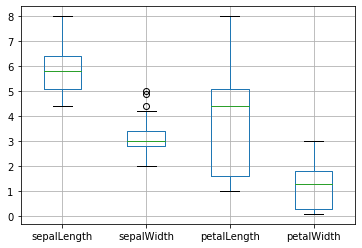

In [5]:
df.loc[df['species']=='default','species']=0 #aquí se cambian los default por 0
df.boxplot(column=['sepalLength','sepalWidth','petalLength','petalWidth']) #este es el boxplot
plt.show()


3. Anteriormente se define un rango de valores válidos para los valores del largo y ancho de los petalos y sépalos. Agregue una columna denominada **label**  que identifique cuál de estos valores esta fuera del rango de valores válidos.

In [7]:
SL = (df['sepalLength']<=7.0)&(df['sepalLength']>=4.0)
SW = (df['sepalWidth']<= 4.5)&(df['sepalWidth']>=2.0)
PL = (df['petalLength']>=1.0)&(df['petalLength']<=7.0)
PW = (df['petalWidth']>=0.1)&(df['petalWidth']<=2.5)
#estas 4 líneas son para hacer los arreglos que cumplan las 4 condiciones pedidas

flter = SL&SW&PL&PW #aquí se toman todos al mismo tiempo para filtrar 

df.insert(5,'label',flter,True) #se insertan aquí los label con el filtro.
df

,sepalLength,sepalWidth,petalLength,petalWidth,species,label
0,4.4,3.2,1.3,3.0,setosa,False
1,7.2,3.6,6.1,2.5,virginica,False
2,6.3,3.3,6.0,2.5,virginica,True
3,6.7,3.3,5.7,2.5,virginica,True
4,6.3,3.4,5.6,2.4,virginica,True
5,6.7,3.1,5.6,2.4,virginica,True
6,5.8,2.8,5.1,2.4,virginica,True
7,6.2,3.4,5.4,2.3,virginica,True
8,6.7,3.0,5.2,2.3,virginica,True
9,6.8,3.2,5.9,2.3,virginica,True


4. Realice un gráfico de *sepalLength* vs *petalLength* y otro de *sepalWidth* vs *petalWidth* categorizados por la etiqueta **label**. Concluya sus resultados.

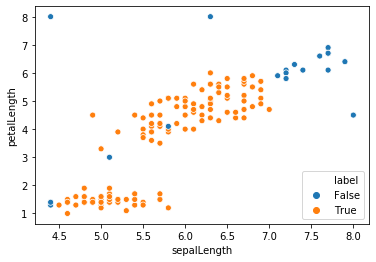

In [11]:
sns.scatterplot(
x='sepalLength', 
y='petalLength', 
    hue='label', 
    data = df 
)
#este es el scatterplot para las longitudes
plt.show()

Se denota que las nubes de puntos están bastante concentradas en medio, salvo un par.
Respecto a los que tienen hasta el 2 de longitud de pétalo aprox, se ve que los sépalos son de menor longitud también.

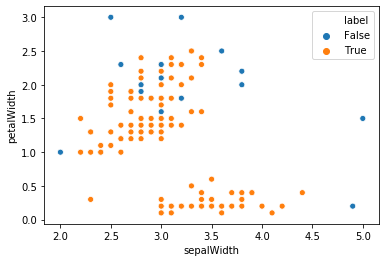

In [12]:
sns.scatterplot(
x='sepalWidth',
y='petalWidth',
    hue='label',
    data = df
)
#Este es el scatterplot para los anchos
plt.show()

Aquí se ve que hay varias que comparten el mismo ancho de los sépalos, y difieren en el ancho de los pétalos. Por eso se ven "rectas verticales".

5. Filtre los datos válidos y realice un gráfico de *sepalLength* vs *petalLength* categorizados por la etiqueta **species**.

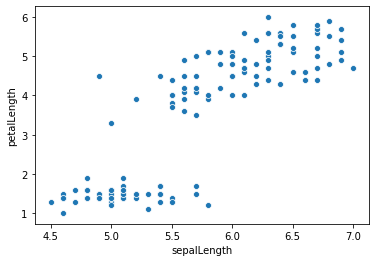

In [15]:
df_filtrado= pd.DataFrame(df.loc[df['label']==True]) #aquí se filtra el dataframe con sólo los que etiqueten True, o sea
                                                    #los que cumplen las 4 condiciones al mismo tiempo.
sns.scatterplot(
x='sepalLength',
y='petalLength',
    data = df_filtrado
)
plt.show()